In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

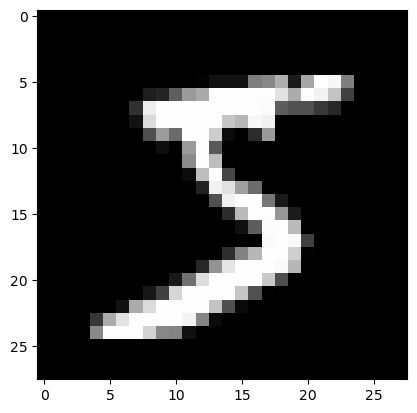

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)   

print(x_train[0], y_train[0])       # 데이터 확인
plt.imshow(x_train[0], 'gray')      # 이미지 확인
plt.show()

# ---------- 전처리 (4차원으로 변환) ---------- #
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(np.unique(y_train, return_counts = True)) 


# 2. 모델


In [10]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(2,2), input_shape=(28,28,1), padding='same', activation='relu')) # output shape = 28, 28, 128
model.add(MaxPooling2D())                                                                                   # output shape = 14, 14, 128 
model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))     
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))                    
model.add(Conv2D(filters=16, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D())                                                                                   # output shape = 14, 14, 128 
model.add(Conv2D(filters=8, kernel_size=(2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        8224      
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 16)        2064      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                  

# 3. 컴파일 및 훈련

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras34_1_mnist.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=32, batch_size=256, validation_split=0.1, callbacks=[ES, MCP])

Epoch 1/32
211/211 [==============================] - 4s 15ms/step - loss: 0.9789 - acc: 0.7033 - val_loss: 0.2023 - val_acc: 0.9413
Epoch 2/32
211/211 [==============================] - 3s 13ms/step - loss: 0.1866 - acc: 0.9440 - val_loss: 0.1086 - val_acc: 0.9698
Epoch 3/32
211/211 [==============================] - 3s 13ms/step - loss: 0.1190 - acc: 0.9647 - val_loss: 0.0988 - val_acc: 0.9705
Epoch 4/32
211/211 [==============================] - 3s 13ms/step - loss: 0.0933 - acc: 0.9715 - val_loss: 0.0820 - val_acc: 0.9755
Epoch 5/32
211/211 [==============================] - 3s 13ms/step - loss: 0.0748 - acc: 0.9774 - val_loss: 0.0798 - val_acc: 0.9782
Epoch 6/32
211/211 [==============================] - 3s 13ms/step - loss: 0.0645 - acc: 0.9798 - val_loss: 0.0638 - val_acc: 0.9825
Epoch 7/32
211/211 [==============================] - 3s 13ms/step - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0573 - val_acc: 0.9843
Epoch 8/32
211/211 [==============================] - 3s 13ms/step - 

# 4. 평가 및 예측

In [13]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0523 - acc: 0.9871
loss:  0.05231843888759613 acc:  0.9871000051498413
